In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)



C:\Users\chukw\AppData\Local\Temp\ipykernel_13428\3186318879.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [ ]:


# # Reflect the existing database into a new model
# Base = automap_base()
# Base.prepare(engine, reflect=True)

# # Access the table classes using the correct names
# Measurement = Base.classes.measurement
# Stations = Base.classes.station

# # Create a session to interact with the database
# session = Session(engine)

# # Query the Measurement table
# measurement_results = session.query(Measurement).all()
# print("Measurement Results:")
# for result in measurement_results:
#     print(result)

# # Query the Stations table
# station_results = session.query(Stations).all()
# print("\nStation Results:")
# for result in station_results:
#     print(result)

# # Close the session
# session.close()


In [ ]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [ ]:
# Save references to each table

Measurement = Base.classes.measurement
Stations = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(most_recent_date)



2017-08-23


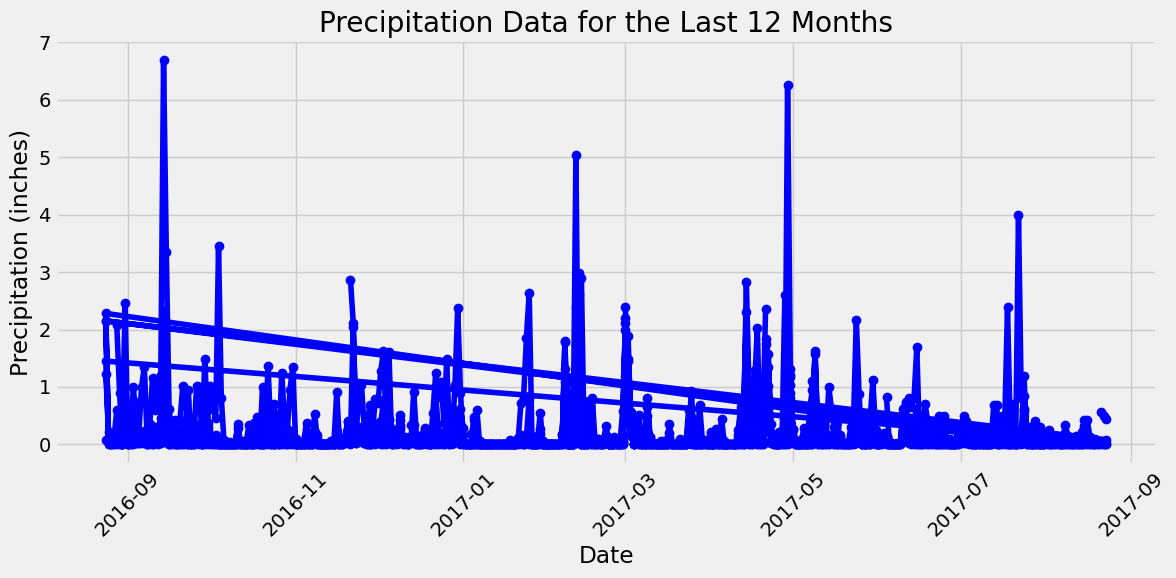

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()

most_recent_date = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')


# Calculate the date one year from the last date in data set.

one_year_prior = most_recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_index(inplace=True)
df.set_index('Date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Precipitation'], marker='o', linestyle='-', color='b')
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Stations.id)).scalar()


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

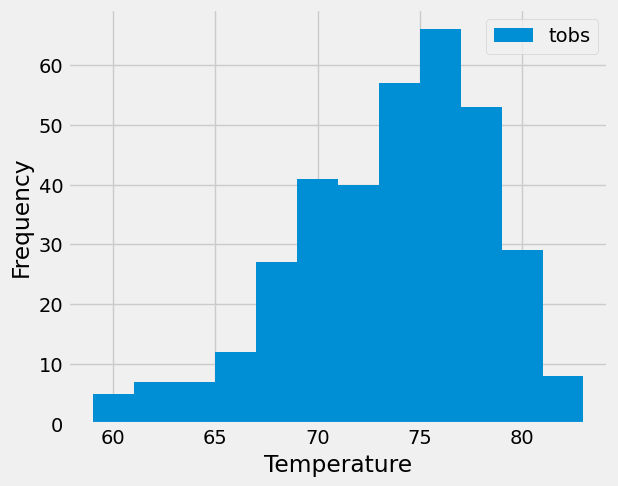

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()